# 1. Thông tin chung
Thành viên:

|MSSV|Họ tên|
|----|-----|
|19120080|Lê Đức Huy|
|19120298|Mai Duy Nam|

# 2. Thông tin về dữ liệu

## 2.1 Thông tin chung
Dataset trong đồ án này được lấy từ Kaggle tại [đây](https://www.kaggle.com/halhuynh/it-jobs-dataset).

Dataset này chứa thông tin về các công ty IT ở Việt Nam và các công việc được đăng tải bởi các công ty này. Dữ liệu này được tác giả crawl từ trang web [ITviec](https://itviec.com/). Dataset này bao gồm 2 file:
* `companies.csv` chứa thông tin về các công ty (tên công ty, lượt rating, lượt review, địa chỉ, v.v.) có tăng tải việc làm trên ITviec
* `jobs.csv` chứa thông tin về việc làm được đăng tải bởi các công ty (tên công việc, mô tả, yêu cầu kỹ năng, v.v.)

Hai tập dữ liệu này có mối liên hệ với nhau thông qua cột `company_id`.

## 2.2 Khám phá dữ liệu

Ở các phần sau, ta lần lượt khám phá 2 bộ dữ liệu `companies` và `jobs` thu thập được

### 2.2.1 `companies`

#### Nạp dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
companies_df = pd.read_csv('dataset/companies.csv')
companies_df.head()

,company_id,company_name,average_rating,num_review,city,type,num_employee,country,working_day,OT,overview,expertise,benifit,logo_link
0,kms-technology,KMS Technology,4.0,197 Reviews,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...,https://itviec.com/rails/active_storage/repres...
1,nab-in-collaboration-with-positive-thinking-co...,NAB in collaboration with Positive Thinking Co...,4.4,11 Reviews,Ho Chi Minh,Product,501-1000,Australia,Monday - Friday,No OT,NAB in collaboration with Positive Thinking Co...,Languages &amp; Frameworks\n\n\nJavaScript ES6...,THE BENEFITS AND PERKS\n\n\n\n\nVery competiti...,https://itviec.com/rails/active_storage/repres...
2,robert-bosch-engineering-and-business-solutions,Robert Bosch Engineering And Business Solutions,3.2,217 Reviews,"Ho Chi Minh, Ha Noi",Product,1-50,Germany,Monday - Friday,No OT,Robert BOSCH Engineering and Business Solution...,Embedded Software for Automotive Applications\...,Why \nBOSCH\n?\n\nBecause we don't just follow...,https://itviec.com/rails/active_storage/repres...
3,gft-technologies-vietnam,GFT Technologies Vietnam,NaN,Reviews,"Ho Chi Minh, Ha Noi",Outsourcing,51-150,Germany,Monday - Friday,No OT,Working at GFT Vietnam\n\n\nGFT is driving the...,"Technical frameworks\n\n\nJava/Kotlin, Spring ...",HR benefits\n\n\n\n\nCompetitive salary\n\n\nS...,https://itviec.com/rails/active_storage/repres...
4,tyme,Tyme,4.6,29 Reviews,"Ho Chi Minh, Ha Noi",Product,151-300,Vietnam,Monday - Friday,No OT,Tyme Vietnam\n is the international arm of \nT...,Mobile/ Tablet Development: \nNative Android/i...,Our goal is simple: to be the #1 digital techn...,https://itviec.com/rails/active_storage/repres...


#### Số lượng dòng và cột

In [3]:
print('Number of rows: {}\nNumber of columns: {}'.format(*companies_df.shape))

Number of rows: 2041
Number of columns: 14


#### Các dòng có ý nghĩa gì?
Mỗi dòng chứa thông tin của một công ty dựa theo trang ITviec. Mỗi công ty có một ID duy nhất.

Kiểm tra có dòng nào bị lặp hay không.

In [4]:
companies_df.duplicated().sum() != 0

False

Kiểm tra có ID công ty nào bị lặp hay không.

In [5]:
companies_df.duplicated('company_id').sum() != 0

False

#### Các cột có ý nghĩa gì?
Tác giả của bộ dữ liệu không mô tả chi tiết về ý nghĩa của các một mà chỉ nói "The column names are self-explained". Do đó ta phải tự suy luận về ý nghĩa của các cột:
* `company_id`: ID của công ty
* `company_name`: tên công ty
* `average_rating`: số điểm rating trung bình của công ty trên thang điểm 5
* `num_review`: số lượt review công ty
* `city`: thành phố
* `type`: loại hình công ty (outsourcing hay product)
* `num_employee`: số lượng nhân viên
* `country`: quốc gia
* `working_day`: ngày làm việc trong tuần
* `OT`: các chính sách về làm thêm giờ
* `overview`: tổng quan về công ty
* `expertise`: lĩnh vực chuyên ngành
* `benifit` (sai chính tả, phải là `benefit`): lợi ích khi tham gia công ty
* `logo_link`: đường dẫn đến logo công ty

Có một vấn đề về ý nghĩa các cột: cột `city` không thống nhất với cột `country` (có công ty có thành phố là `Ho Chi Minh` nhưng quốc gia là `Australia`). Do các công ty có thể có nhiều trụ sở đặt ở nhiều quốc gia, trong cùng quốc gia cũng được đặt ở nhiều thành phố khác nhau, cho nên trong các bước phân tích tiếp theo ta sẽ giả sử hai cột `city` và `country` có ý nghĩa như sau:
* Cột `city` chứa các thành phố ở Việt Nam nơi các văn phòng của công ty được đặt.
* Cột `country` chứa quốc gia nơi trụ sở chính của công ty được đặt.

Các cột còn lại đều có ý nghĩa rõ ràng, không có gì gây khó hiểu.

Trước khi đến bước phân tích tiếp theo, ta thực hiện một số thay đổi về các cột như sau:
* Đổi tên các cột cho hợp lý:
    * Đổi tên cột `benifit` bị sai chính tả
    * Đổi tên cột `city`, `num_review`, `num_employee` và `working_day` thành số nhiều
    * Đổi tên cột `OT` thành `overtime` để thống nhất với các tên cột còn lại
* Loại bỏ cột `logo_link` do không cần thiết

In [6]:
companies_df.rename(columns={'benifit': 'benefit',
                             'city': 'cities',
                             'num_review': 'num_reviews',
                             'num_employee': 'num_employees',
                             'working_day': 'working_days',
                             'OT': 'overtime'}, inplace=True)
companies_df.drop(columns='logo_link', inplace=True)

#### Mỗi cột có kiểu dữ liệu thế nào và có phù hợp để xử lý tiếp không?

In [7]:
companies_df.dtypes

company_id         object
company_name       object
average_rating    float64
num_reviews        object
cities             object
type               object
num_employees      object
country            object
working_days       object
overtime           object
overview           object
expertise          object
benefit            object
dtype: object

Có hai cột có thể phải cân nhắc chuyển về dạng số là `num_reviews` và `num_employees`. Các cột khác đều đã có kiểu dữ liệu phù hợp.

Đối với cột `num_employees`, dữ liệu của ta được thu thập theo dạng một khoảng giá trị. Việc chuyển đổi cột này về dạng số hay không phụ thuộc vào phân tích nào mà ta đang thực hiện. Do đó tạm thời ở bước này ta không thay đổi cột `num_employees`.

In [8]:
companies_df.num_employees.unique()

array(['1000+', '501-1000', '1-50', '51-150', '151-300', '301-500'],
      dtype=object)

Đối với `num_reviews`, kiểm tra các giá trị unique của nó, ta thấy các giá trị đều có dạng: `"<một số> Review[s]"`, ngoại trừ giá trị duy nhất không tuân theo pattern này là `Reviews`. Vì vậy, ta có thể lấy ra giá trị số, lọc bỏ chuỗi ` Reviews` dư thừa và chuyển kiểu dữ liệu cột thành dạng float. Đối với giá trị `Reviews`, ta gán bằng NaN.

In [9]:
companies_df.num_reviews.unique()

array(['197 Reviews', '11 Reviews', '217 Reviews', 'Reviews',
       '29 Reviews', '16 Reviews', '8 Reviews', '60 Reviews', '9 Reviews',
       '127 Reviews', '6 Reviews', '34 Reviews', '3 Reviews',
       '20 Reviews', '185 Reviews', '1486 Reviews', '57 Reviews',
       '22 Reviews', '68 Reviews', '1 Review', '21 Reviews', '12 Reviews',
       '23 Reviews', '7 Reviews', '17 Reviews', '5 Reviews', '96 Reviews',
       '37 Reviews', '207 Reviews', '109 Reviews', '4 Reviews',
       '33 Reviews', '76 Reviews', '18 Reviews', '10 Reviews',
       '2 Reviews', '65 Reviews', '15 Reviews', '41 Reviews',
       '19 Reviews', '27 Reviews', '13 Reviews', '26 Reviews',
       '42 Reviews', '183 Reviews', '24 Reviews', '54 Reviews',
       '14 Reviews', '38 Reviews', '451 Reviews', '28 Reviews',
       '36 Reviews', '52 Reviews', '31 Reviews', '92 Reviews',
       '30 Reviews', '86 Reviews', '32 Reviews', '25 Reviews',
       '43 Reviews', '46 Reviews', '97 Reviews', '44 Reviews',
       '226 Revi

In [10]:
import re
def get_num_reviews(x):
    result = re.match('^(\d+) Reviews?$', x)
    return float(result.group(1)) if result != None else np.nan
companies_df.num_reviews = companies_df.num_reviews.map(get_num_reviews, na_action='ignore')
companies_df.num_reviews.unique()

array([1.970e+02, 1.100e+01, 2.170e+02,       nan, 2.900e+01, 1.600e+01,
       8.000e+00, 6.000e+01, 9.000e+00, 1.270e+02, 6.000e+00, 3.400e+01,
       3.000e+00, 2.000e+01, 1.850e+02, 1.486e+03, 5.700e+01, 2.200e+01,
       6.800e+01, 1.000e+00, 2.100e+01, 1.200e+01, 2.300e+01, 7.000e+00,
       1.700e+01, 5.000e+00, 9.600e+01, 3.700e+01, 2.070e+02, 1.090e+02,
       4.000e+00, 3.300e+01, 7.600e+01, 1.800e+01, 1.000e+01, 2.000e+00,
       6.500e+01, 1.500e+01, 4.100e+01, 1.900e+01, 2.700e+01, 1.300e+01,
       2.600e+01, 4.200e+01, 1.830e+02, 2.400e+01, 5.400e+01, 1.400e+01,
       3.800e+01, 4.510e+02, 2.800e+01, 3.600e+01, 5.200e+01, 3.100e+01,
       9.200e+01, 3.000e+01, 8.600e+01, 3.200e+01, 2.500e+01, 4.300e+01,
       4.600e+01, 9.700e+01, 4.400e+01, 2.260e+02, 1.790e+02, 6.600e+01,
       4.500e+01, 4.900e+01, 5.800e+01, 2.320e+02, 8.700e+01])

#### Với mỗi cột kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

In [11]:
numerical_columns = ['average_rating', 'num_reviews']
categorical_columns = companies_df.columns.to_list()
categorical_columns.remove('average_rating')
categorical_columns.remove('num_reviews')

In [12]:
companies_df[numerical_columns].describe()

,average_rating,num_reviews
count,563.000000,869.000000
mean,3.987034,12.989643
std,0.597378,57.202636
min,2.000000,1.000000
25%,3.600000,2.000000
50%,4.000000,4.000000
75%,4.400000,10.000000
max,5.000000,1486.000000


In [13]:
companies_df[numerical_columns].isna().sum() / companies_df[numerical_columns].shape[0] * 100

average_rating    72.415483
num_reviews       57.422832
dtype: float64

Có thể thấy, số lượng giá trị thiếu của các cột số là khá lớn. Còn lại, các số liệu thống kê khác đều ổn, không có điều gì bất thường.

#### Với mỗi cột dạng phân loại, các giá trị được phân bố thế nào

In [14]:
desc = companies_df[categorical_columns].describe()
desc

,company_id,company_name,cities,type,num_employees,country,working_days,overtime,overview,expertise,benefit
count,2041,2041,2041,2041,2041,2041,2026,1865,2040,477,1576
unique,2041,2041,71,2,6,39,2,4,2022,474,1573
top,kms-technology,KMS Technology,"District 1, Ho Chi Minh",Product,1-50,Vietnam,Monday - Friday,No OT,.,"C++, VC++, C# .NET Framework Web Framework Jav...",Salary: Competitive (based on skills and exper...
freq,1,1,190,1534,1054,1202,1855,1589,12,2,2


Tỷ lệ giá trị thiếu

In [15]:
(1 - desc.loc['count'] / companies_df.shape[0]) * 100

company_id             0.0
company_name           0.0
cities                 0.0
type                   0.0
num_employees          0.0
country                0.0
working_days      0.734934
overtime          8.623224
overview          0.048996
expertise        76.629103
benefit           22.78295
Name: count, dtype: object

Một số giá trị ngẫu nhiên

In [16]:
companies_df[categorical_columns].sample(8)

,company_id,company_name,cities,type,num_employees,country,working_days,overtime,overview,expertise,benefit
1083,vntrip-ota,Vntrip OTA,"Thanh Xuan, Ha Noi",Product,151-300,Vietnam,Monday - Friday,No OT,Vntrip.vn là hệ thống đặt phòng khách sạn trực...,"Ngày 11/7/2016, Vntrip công bố được rót vốn 3 ...",Phòng Công nghệ Vntrip đang chiêu mộ những thà...
1296,maple-labs,MAPLE LABS,"District 2, Ho Chi Minh",Product,1-50,Vietnam,Monday - Friday,No OT,Maple Labs được xây dựng và phát triển với mục...,NaN,"Friendly, flexible, and fun working environmen..."
1886,chutam,Chutam,"Tan Phu, Ho Chi Minh",Outsourcing,1-50,Vietnam,Monday - Friday,No OT,Chu Tam began as a network equipment provider ...,NaN,NaN
190,infomed-viet-nam-jsc,Infomed Viet Nam JSC,"Ha Noi, Ho Chi Minh",Outsourcing,51-150,Vietnam,Monday - Friday,No OT,Công ty Cổ phần INFOMED - thành viên của VMED ...,NaN,"Thưởng cố định tháng lương 13,\n\n\nThưởng KPI..."
1509,intelligent-t-e-executionlab,Intelligent T&E (ExecutionLab),"Tan Binh, Ho Chi Minh",Outsourcing,1-50,Vietnam,Monday - Friday,No OT,Executionlab is a software development company...,NaN,"A young, friendly work environment with highly..."
1283,tap-doan-danh-khoi,Tập Đoàn Danh Khôi,"Phu Nhuan, Ho Chi Minh",Product,51-150,Vietnam,Monday - Saturday,No OT,Danh Khôi Holdings đã và đang tiếp tục ghi dấu...,NaN,"Working in a professional, creative and develo..."
923,b2be-gss-vietnam,B2BE GSS Vietnam,"District 3, Ho Chi Minh",Product,301-500,Australia,Monday - Friday,No OT,"Founded in Australia in 1998, B2BE operates ac...",NaN,"International, dynamic, friendly working envir..."
205,relationshop-inc,Relationshop Inc.,"Binh Thanh, Ho Chi Minh",Product,1-50,United States,Monday - Friday,No OT,Relationshop®️ is leading the industry with te...,NaN,Working in a progressive and international env...


Có thể thấy dữ liệu dạng phân loại khá đầy đủ (ngoại trừ cột `expertise` số lượng giá trị thiếu lên đến 70%).

### 2.2.2 `jobs`

#### Nạp dữ liệu

In [17]:
jobs_df = pd.read_csv('dataset/jobs.csv')
jobs_df.head()

,job_id,company_id,job_name,taglist,location,three_reasons,description
0,kms-technology:jrsr_qa_engineer_kms_labs_bonus,kms-technology,"(Jr/Sr) QA Engineer, KMS Labs - BONUS",QA QC English Tester,"290/26 Nam Ky Khoi Nghia, ward 8, District 3, ...",Inspired Leadership Team and Talented Colleagu...,KMS Labs is the startup incubation arm of KMS ...
1,kms-technology:engineering_manager_bonus,kms-technology,Engineering Manager - BONUS,Project Manager Agile English,"02 Tan Vien, ward 2, Tan Binh, Ho Chi Minh",Inspired Leadership Team and Talented Colleagu...,Full 13th Month Salary. ***Apply and Join in S...
2,kms-technology:fullstack_mobile_mobilenodejs_k...,kms-technology,"Fullstack Mobile (Mobile,NodeJs) Kobiton",NodeJS React Native Fresher Accepted,"02 Tan Vien, ward 2, Tan Binh, Ho Chi Minh",Inspired Leadership Team and Talented Colleagu...,is the mobile experience platform trusted by l...
3,kms-technology:jrsrprincipal_java_developer_bonus,kms-technology,(Jr/Sr/Principal) Java Developer- BONUS,Java JavaScript Spring,"174 Thai Ha, Dong Da, Ha Noi",Inspired Leadership Team and Talented Colleagu...,Full 13th Month Salary ***Apply and Join in Se...
4,kms-technology:product_manager_kms_labs_bonus,kms-technology,"Product Manager, KMS Labs - BONUS",Product Manager English Manager,"290/26 Nam Ky Khoi Nghia, ward 8, District 3, ...",Inspired Leadership Team and Talented Colleagu...,KMS Labs\n is the startup incubation arm of KM...


#### Số lượng dòng và cột

In [18]:
print('Number of rows: ', jobs_df.shape[0])
print('Number of columns: ', jobs_df.shape[1])

Number of rows:  1412
Number of columns:  7


#### Mỗi dòng có ý nghĩa gì ?

Mỗi dòng là thông tin của một công việc đang được đăng tin tuyển dụng trên ITViec.

Mỗi dòng được phân biệt bởi `job_id`

#### Dữ liệu có bị lặp không?

In [19]:
jobs_df.duplicated().sum() != 0

False

Như vậy dữ liệu không bị trùng lặp giữa các dòng.

Kiểm tra cột `job_id` có bị lặp không?

In [20]:
jobs_df.duplicated('job_id').sum() != 0

True

Như vậy ở cột `job_id` có dữ liệu trùng lặp. Ta sẽ kiểm tra tiếp ở dưới.

Trích xuất các dòng có dữ liệu lặp:

In [21]:
jobs_df[jobs_df.duplicated('job_id', keep=False)]

,job_id,company_id,job_name,taglist,location,three_reasons,description
301,houze-group:backend_lead_pythongolangnodejs,houze-group,Backend Lead ( Python/Golang/NodeJS),NodeJS Python Golang,"114-116 Ngô Quyền, Phường 8, District 5, Ho Ch...",Attractive salary and benefits package\nCareer...,"Define, code, test, and deploy new features to..."
303,houze-group:backend_lead_pythongolangnodejs,houze-group,Backend Lead ( Python/Golang/NodeJS/...),Team Leader Python Golang,"114-116 Ngô Quyền, Phường 8, District 5, Ho Ch...",Attractive salary and benefits package\nCareer...,"Define, code, test, and deploy new features to..."


Như vậy theo quan sát, ta thấy giữa 2 dòng chỉ khác biệt ở cột `taglist`, tất cả các cột còn lại đều giống nhau.

Ở đây cả bộ dữ liệu chỉ duy nhất 1 `job_id` bị trùng lặp. Để tiện xử lý ta sẽ loại bỏ 1 hàng (cụ thể hàng cuối).

In [22]:
jobs_df = jobs_df.drop_duplicates('job_id', keep = 'first')

Số lượng dòng sau khi xử lý:

In [23]:
print('Number of rows: ', len(jobs_df))

Number of rows:  1411


#### Mỗi cột có ý nghĩa gì?

Bởi dữ liệu được thu thập trên Kaggle, tuy nhiên tác giả không cung cấp thông tin về ý nghĩa của các cột, chính vì thế, dựa vào ý nghĩa của dữ liệu ta sẽ định nghĩa các cột như sau:
   * `job_id`: ID của công việc
   * `company_id`: ID của công ty đăng tuyển công việc
   * `job_name`: tên công việc
   * `taglist`: danh sách tag liên quan đến công việc
   * `location`: địa điểm làm việc
   * `three_reasons`: phúc lợi/lý do nên làm việc ở đây
   * `description`: mô tả công việc

#### Mỗi cột có kiểu dữ liệu gì? Có phù hợp để xử lý tiếp không?

In [24]:
jobs_df.dtypes

job_id           object
company_id       object
job_name         object
taglist          object
location         object
three_reasons    object
description      object
dtype: object

Như đã thấy tất cả thông tin về công việc không có cột nào nên đưa về dạng số nên ta không cần xử lý gì thêm ở bước này, tất cả dữ liệu đã có kiểu dữ liệu phù hợp để xử lý.

#### Phân tích các cột dữ liệu dạng số

Trong các cột dữ liệu trên, không có cột dữ liệu nào dạng số nên ta không thể thống kê các giá trị được.

#### Với mỗi cột dang phân loại, các giá trị được phân bố như thế nào?

In [25]:
statistic = jobs_df.describe()
statistic

,job_id,company_id,job_name,taglist,location,three_reasons,description
count,1411,1411,1411,1411,1411,1097,1411
unique,1411,682,1358,923,696,492,1408
top,kms-technology:jrsr_qa_engineer_kms_labs_bonus,vietnam-international-bank-vib,"Frontend Dev (JavaScript, HTML5, CSS)",JavaScript HTML5 CSS,"Sailing Tower Building, District 1, Ho Chi Minh",Global Exposure\nFast Track Career\nDiversifie...,Asilla là một startup công nghệ tiên phong phá...
freq,1,27,8,20,19,17,2


Số lượng giá trị thiếu ở mỗi cột:

In [26]:
miss_info = len(jobs_df) - statistic.loc['count']
miss_info

job_id             0
company_id         0
job_name           0
taglist            0
location           0
three_reasons    314
description        0
Name: count, dtype: object

Tỉ lệ giá trị thiếu:

In [27]:
miss_info/len(jobs_df) * 100

job_id                 0.0
company_id             0.0
job_name               0.0
taglist                0.0
location               0.0
three_reasons    22.253721
description            0.0
Name: count, dtype: object

Như đã thống kê, đa phần các cột có đầy đủ các dữ liệu trừ cột `three_reason` tỉ lệ thiếu lên tới 22,25\%.
Nhìn vào hàng `unique`, đa phần có giá trị khá lớn, cho thấy được sự đa dạng của việc tuyển dụng ở lĩnh vực IT.

Một số giá trị ngẫu nhiên:

In [28]:
jobs_df.sample(10)

,job_id,company_id,job_name,taglist,location,three_reasons,description
319,home-credit-vietnam:senior_net_developer_signo...,home-credit-vietnam,Senior .NET Developer (Sign-on bonus),ASP.NET C# English,"20 Nguyen Dang Giai, District 2, Ho Chi Minh","Attractive salary, remunerative benefits and p...",•\nData-mining and/or software developing\n\n\...
574,mitek-viet-nam:qa_lead_qa_qc_python_c_net,mitek-viet-nam,"QA Lead (QA QC, Python, C#, .Net)",QA QC Python C#,"Tòa nhà A5, Lô số A5, Khu E-Office, đường Sáng...",Extremely competitive salary.\nOpportunity for...,"Lead in creating, executing, debugging, config..."
177,fpt-software:test_engineer_manualautomation,fpt-software,Test Engineer (Manual/Automation),Tester English Data Analyst,"FPT Cau Giay Building, Cau Giay, Ha Noi",Global Exposure\nFast Track Career\nDiversifie...,Analyze software project requirements and test...
152,vng-corporation:qc_engineer_vng_cloud_tester,vng-corporation,"QC Engineer, VNG CLOUD (Tester)",Tester QA QC Cloud,"432 Nguyen Thi Minh Khai St, District 3, Ho Ch...",Attractive salary & benefits you'll love\nBuil...,Understanding project documents and identifyin...
118,dirox:5_senior_php_developer_mysql_oop,dirox,"5 Senior PHP Developer (MySQL, OOP)",PHP MySQL OOP,"69 D2, Binh Thanh, Ho Chi Minh",WE will open your EYES to the WORLD!\nWE will ...,Developing new complex UI components from scra...
175,fpt-software:project_manager_english,fpt-software,Project Manager (English),Project Manager English Manager,"FPT Cau Giay Building, Cau Giay, Ha Noi",Global Exposure\nFast Track Career\nDiversifie...,Handle various responsibilities such as planni...
1202,9pmp:net_developer_aspnet_sql,9pmp,".NET Developer (ASP.NET, SQL)",.NET SQL ASP.NET,"Level 8, Doxaco Building, 307B Nguyen Van Troi...",Competitive Salary\nFriendly Colleagues\nDevel...,"Write clean, scalable code using .NET programm..."
153,vng-corporation:leadsenior_qa_engineer_auto_za...,vng-corporation,Lead/Senior QA Engineer (Auto) - ZaloPay,Tester Agile Java,"VNG Campus, Tân Thuận Đông, District 7, Ho Chi...",Attractive salary & benefits you'll love\nBuil...,Working closely with the manual members to get...
1206,enable-startup:fullstack_devs_javascript_reactjs,enable-startup,"Fullstack Devs (JavaScript, ReactJS)",JavaScript MySQL ReactJS,"3rd Floor, Quang Dong Tower, 108 Nui Thanh St...","Friendly, positive and open-minded co-workers\...",Participate in On-board training and probation...
787,nexcel-solutions:database_developer_sql_up_to_...,nexcel-solutions,"Database Developer (SQL) Up to $2,000",Database SQL English,"SMS Tower, Quang Trung Software City, District...","High bonus, healthcare insurance, free meals\n...","Develop, update and maintain complex reporting..."


Dữ liệu cho thấy được không có sự bất thường ở bộ dữ liệu này.
Tuy nhiên dữ liệu ở 2 cột `three_reasons` và `description` có các dòng dữ liệu thuộc 2 ngôn ngữ khác nhau (Việt và Anh) có thể gây khó khăn trong việc phân tích.

# 3. Câu hỏi cần trả lời

## 3.1 Các kiến thức/kỹ năng nào đang được các công ty tuyển dụng nhiều nhất?

### 3.1.1 Nêu vấn đề

Trên thực tế, nhiều người chọn học ngành IT nghĩ rằng vì ngành này hot, lương cao, nhiều việc làm. Tuy nhiên ngành IT lại quá nhiều định hướng, dẫn đến đại đa số sinh viên theo học ngành này nếu không đam mê hay định hướng cụ thể thì sẽ bị mông lung không biết nên học theo hướng nào? và họ luôn suy nghĩ rằng học hướng đó liệu có tìm được việc làm hay không? nên học kỹ năng nào, kiến thức nào để có thể dễ dàng tìm được việc làm?

Chính vì thế, câu hỏi này ra đời nhằm mục đích cho biết hiện nay, trên thị trường ngành IT, người ta đang tuyển nhân sự có những kỹ năng gì là chủ yếu, giúp cho sinh viên có thể lựa chọn được những hướng đi phù hợp, có thể dễ dàng tìm kiếm việc làm vì nhu cầu cần thiết của xã hội cao.

### 3.1.2 Data Preprocessing

Qua quá trình quan sát dữ liệu, ta biết được thông tin cột `taglist` thể hiện những kỹ năng/kiến thức liên quan đến ngành nghề IT đang được tuyển dụng.
Quá trình xử lý dữ liệu:
* Lấy các giá trị cột `taglist` và bỏ đi các giá trị rỗng.
* Do cấu trúc dữ liệu cột này chưa phù hợp, ta sẽ biến các tag này thành dạng list.
* Gom nhóm

Đầu tiên, ta lấy dữ liệu cột `taglist` và bỏ các giá trị rỗng.

In [29]:
#Do giá trị rỗng không có (đã khám phá ở trên) nên ta không cần bước bỏ các dòng dữ liệu thiếu.
taglist = jobs_df["taglist"]
taglist

0                        QA QC   English   Tester 
1               Project Manager   Agile   English 
2        NodeJS   React Native   Fresher Accepted 
3                      Java   JavaScript   Spring 
4             Product Manager   English   Manager 
                           ...                    
1407                           Unity   C#   Games 
1408       .NET   C#   ASP.NET   Fresher Accepted 
1409                          .NET   C#   ASP.NET 
1410                JavaScript   NodeJS   ReactJS 
1411                    Python   Django   ReactJS 
Name: taglist, Length: 1411, dtype: object

Kiểu dữ liệu hiện tại của mỗi hàng là gì?

In [30]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))  
    return dtypes

open_object_dtype(taglist)

{str}

Như đã thấy phía trên, dữ liệu hiện tại của các hàng taglist là string.

Ta cần đưa về dạng list để dễ dàng phân tích, thống kê.

In [31]:
taglist = taglist.str.strip().str.split('\s{2,}')
taglist

0                       [QA QC, English, Tester]
1              [Project Manager, Agile, English]
2       [NodeJS, React Native, Fresher Accepted]
3                     [Java, JavaScript, Spring]
4            [Product Manager, English, Manager]
                          ...                   
1407                          [Unity, C#, Games]
1408       [.NET, C#, ASP.NET, Fresher Accepted]
1409                         [.NET, C#, ASP.NET]
1410               [JavaScript, NodeJS, ReactJS]
1411                   [Python, Django, ReactJS]
Name: taglist, Length: 1411, dtype: object

Sau khi chuyển về dạng list, ta sẽ tách các phần tử mỗi list ra thành dòng để tiện cho việc thống kê.

In [32]:
taglist = taglist.explode()
taglist

0                 QA QC
0               English
0                Tester
1       Project Manager
1                 Agile
             ...       
1410             NodeJS
1410            ReactJS
1411             Python
1411             Django
1411            ReactJS
Name: taglist, Length: 4262, dtype: object

Số các giá trị khác nhau mà dữ liệu đưa ra:

In [33]:
len(taglist.unique())

79

In [34]:
taglist.unique()

array(['QA QC', 'English', 'Tester', 'Project Manager', 'Agile', 'NodeJS',
       'React Native', 'Fresher Accepted', 'Java', 'JavaScript', 'Spring',
       'Product Manager', 'Manager', 'Business Analyst', 'ReactJS',
       'Ruby on Rails', 'AWS', 'Database', 'SQL', '.NET', 'C#', 'ASP.NET',
       'Scrum', 'Python', 'C++', 'Linux', 'Embedded', 'C language',
       'Software Architect', 'OOP', 'Django', 'JQuery', 'Team Leader',
       'Cloud', 'Kotlin', 'Blockchain', 'Data Analyst', 'Android', 'iOS',
       'DevOps', 'Swift', 'ERP', 'Oracle', 'System Engineer',
       'Networking', 'MySQL', 'Scala', 'System Admin', 'PHP', 'Laravel',
       'Angular', 'VueJS', 'Sharepoint', 'UI-UX', 'PostgreSql',
       'Designer', 'IT Support', 'Objective C', 'Golang', 'Xamarin',
       'CSS', 'HTML5', 'SAP', 'Flutter', 'NoSQL', 'JSON', 'MVC', 'J2EE',
       'Ruby', 'Unity', 'Drupal', 'Wordpress', 'AngularJS', 'Hybrid',
       'Games', 'Bridge Engineer', 'Magento', 'Japanese', 'Cocos'],
      dtype=obj

Như đã thấy ở phía trên, các giá trị của taglist là các tag về kỹ năng/ kiến thức cần để có thể ứng tuyển công việc. 

Tuy nhiên ở đây có 1 giá trị là `Fresher Accepted` không phải là kỹ năng, cũng không phải là kiến thức cần có mà nó chỉ là một điều kiện có thể ứng tuyển công việc. Vì vậy ta sẽ loại bỏ giá trị này đi.

In [35]:
taglist = taglist[taglist != "Fresher Accepted"]
taglist

0                 QA QC
0               English
0                Tester
1       Project Manager
1                 Agile
             ...       
1410             NodeJS
1410            ReactJS
1411             Python
1411             Django
1411            ReactJS
Name: taglist, Length: 4046, dtype: object

Như vậy là hoàn thành bước tiền xử lý dữ liệu.

### 3.1.3 Analysis, Visualization

Đầu tiên ta phải đếm số lượng các giá trị để có thể trực quan bằng các biểu đồ.

In [36]:
taglist = taglist.value_counts()
taglist

Java               265
JavaScript         244
QA QC              169
Tester             169
ReactJS            164
                  ... 
Hybrid               2
Japanese             2
Xamarin              1
Bridge Engineer      1
Cocos                1
Name: taglist, Length: 78, dtype: int64

Sử dụng `barh` chart để so sánh số lượng được đề cập tới giữa các kỹ năng.

<AxesSubplot:ylabel='Skill'>

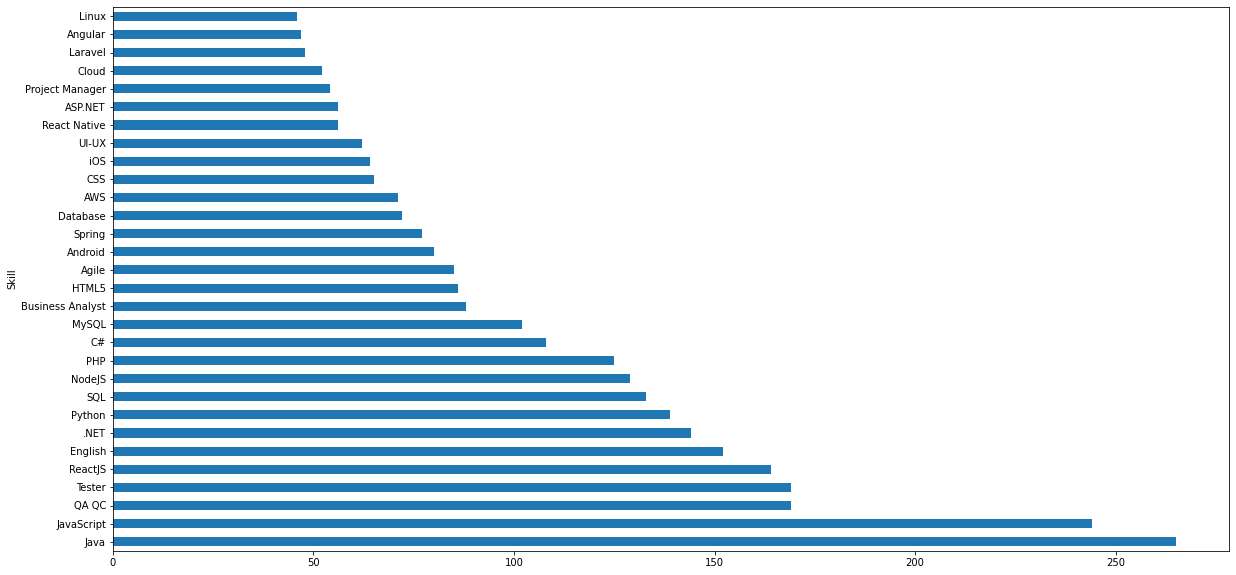

In [37]:
taglist[0:30].plot(kind = 'barh', figsize = (20,10), ylabel = "Amount", xlabel = "Skill")

Với một vài bước biến đổi đơn giản, ta đã có thể trực quan hóa được tính thiết yếu của các kỹ năng.

Số lượng càng cao nghĩa là càng có nhiều công việc cần kỹ năng đó và ngược lại.

Qua việc visualization ở trên, dễ dàng ta có thể nhận ra:
* Về mặt ngôn ngữ lập trình: Java, Javascript là 2 ngôn ngữ được tuyển dụng nhiều nhất, với trên 200 lượt tuyển dụng.
* Về mặt kỹ năng: các kỹ năng về QA QC, Tester là 2 vị trí đang được tuyển dụng nhiều nhất với trên 150 lượt tuyển dụng.
* Về mặt ngôn ngữ: English luôn là lựa chọn hàng đầu với trên 150 lượt.

### 3.1.4 Kết luận

Quay trở lại câu hỏi, như vậy các kỹ năng/kiến thức nào được các công ty tuyển dụng nhiều nhất?

Java, JavaScript, QA QC, Tester, ReactJS, English,... là các kiến thức, kỹ năng được tuyển dụng nhiều nhất. Bởi lẽ do tính đa dụng của nó. Ví dụ như Java hay JavaScript vừa có thể code web mà cũng có thể code app và có thể làm thêm nhiều thứ nữa.

Như vậy, cần học gì để không thất nghiệp, dễ dàng có việc làm?

Trong tương lai gần, thì ta có thể chọn học các ngôn ngữ như Java, JavaScript, rèn luyện thêm ngoại ngữ như English bởi lẽ nhu cầu tuyển dụng của các công ty về các kỹ năng này rất cao, mà nhân lực có kỹ năng tại Việt Nam hiện tại vẫn chưa đáp ứng đủ. Chính vì vậy, dựa vô thống kê, trực quan ở trên, ta có thể xác định được hướng đi để có thể dễ dàng kiếm được công việc sau khi ra trường.

## 3.2 Những quốc gia nào có số lượng tuyển nhân lực ngành IT ở Việt Nam lớn nhất?

### 3.2.1 Nêu vấn đề

Giữa một thị trường hiện đang rất màu mỡ như IT khiến cho người người nhà nhà chạy đua nhau học. Để cạnh tranh cơ hội có việc làm tốt ở một công ty thuộc nước ngoài là điều càng ngày khó khăn hơn.

Vậy khi tuyển dụng, giữa 2 ứng viên có technical skill ngang nhau thì người ta sẽ ưu tiên ai? Câu trả lời là nhà tuyển dụng sẽ ưu tiên người có ngoại ngữ tốt, giao tiếp tốt, phù hợp với công ty, văn hóa của họ và có thể giao tiếp trao đổi trực tiếp với người nước ngoài.

Đối với một nhân viên thì việc biết được văn hóa công ty đó, có khả năng giao tiếp trực tiếp với sếp của họ bằng chính tiếng của họ sẽ có khả năng thăng tiến cao hơn bởi họ sẽ là người làm việc trực tiếp với sếp mà không cần thông qua người khác.

Như vậy, nếu biết được những quốc gia đang đầu tư mạnh về lĩnh vực IT ở Việt Nam, ta sẽ tìm hiểu về văn hóa đất nước đó để tìm hiểu về cách làm việc cũng như chọn ngôn ngữ đó làm ngoại ngữ thứ 2 để có thể học, tạo lợi thế cho bản thân khi ứng tuyển và cơ hội thăng chức khi đã làm việc là một điều cần làm.

### 3.2.2 Data Preprocessing

Trước tiên ta phải merge 2 bộ dữ liệu với nhau để gắn kết công việc nào thuộc công tin nào, dựa vào cột `company_id`

In [38]:
jobs_companies_df = pd.merge(jobs_df, companies_df, on = "company_id")
jobs_companies_df.head()

,job_id,company_id,job_name,taglist,location,three_reasons,description,company_name,average_rating,num_reviews,cities,type,num_employees,country,working_days,overtime,overview,expertise,benefit
0,kms-technology:jrsr_qa_engineer_kms_labs_bonus,kms-technology,"(Jr/Sr) QA Engineer, KMS Labs - BONUS",QA QC English Tester,"290/26 Nam Ky Khoi Nghia, ward 8, District 3, ...",Inspired Leadership Team and Talented Colleagu...,KMS Labs is the startup incubation arm of KMS ...,KMS Technology,4.0,197.0,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...
1,kms-technology:engineering_manager_bonus,kms-technology,Engineering Manager - BONUS,Project Manager Agile English,"02 Tan Vien, ward 2, Tan Binh, Ho Chi Minh",Inspired Leadership Team and Talented Colleagu...,Full 13th Month Salary. ***Apply and Join in S...,KMS Technology,4.0,197.0,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...
2,kms-technology:fullstack_mobile_mobilenodejs_k...,kms-technology,"Fullstack Mobile (Mobile,NodeJs) Kobiton",NodeJS React Native Fresher Accepted,"02 Tan Vien, ward 2, Tan Binh, Ho Chi Minh",Inspired Leadership Team and Talented Colleagu...,is the mobile experience platform trusted by l...,KMS Technology,4.0,197.0,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...
3,kms-technology:jrsrprincipal_java_developer_bonus,kms-technology,(Jr/Sr/Principal) Java Developer- BONUS,Java JavaScript Spring,"174 Thai Ha, Dong Da, Ha Noi",Inspired Leadership Team and Talented Colleagu...,Full 13th Month Salary ***Apply and Join in Se...,KMS Technology,4.0,197.0,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...
4,kms-technology:product_manager_kms_labs_bonus,kms-technology,"Product Manager, KMS Labs - BONUS",Product Manager English Manager,"290/26 Nam Ky Khoi Nghia, ward 8, District 3, ...",Inspired Leadership Team and Talented Colleagu...,KMS Labs\n is the startup incubation arm of KM...,KMS Technology,4.0,197.0,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...


Loại bỏ những cột không liên quan, chỉ sử dụng cột cần thiết.

In [39]:
columns = ["company_name", "num_employees", "country","job_id"]
jobs_companies_df = jobs_companies_df[columns]
jobs_companies_df

,company_name,num_employees,country,job_id
0,KMS Technology,1000+,United States,kms-technology:jrsr_qa_engineer_kms_labs_bonus
1,KMS Technology,1000+,United States,kms-technology:engineering_manager_bonus
2,KMS Technology,1000+,United States,kms-technology:fullstack_mobile_mobilenodejs_k...
3,KMS Technology,1000+,United States,kms-technology:jrsrprincipal_java_developer_bonus
4,KMS Technology,1000+,United States,kms-technology:product_manager_kms_labs_bonus
...,...,...,...,...
1406,Go Game Vietnam Limited Liability Company,1-50,Singapore,go-game-vietnam-limited-liability-company:unit...
1407,Đại Việt Group,501-1000,Vietnam,dai-viet-group:software_developer_net_c_aspnet
1408,MISA SOFTWARE,1000+,Vietnam,misa-software:net_dev_net_core_c_signon_bonus
1409,Thuocsi.vn,151-300,Vietnam,thuocsi-vn:remote_fullstack_dev_javascript


Dữ liệu đã sẵn sàng để phân tích và trực quan.

### 3.2.3 Analysis, Visualization

Trước hết, ta phải thống kê số lượng các tuyển dụng theo quy mô công ty và quốc gia (`num_employees` và `country`)

In [40]:
country_size_num = jobs_companies_df.groupby(["country","num_employees"]).size().sort_values(ascending=False)
country_size_num = country_size_num[0:30]
country_size_num

country             num_employees
Vietnam             1-50             262
                    51-150           167
                    1000+            129
                    151-300          122
Singapore           51-150            65
                    1-50              61
Vietnam             301-500           42
United States       51-150            39
Japan               1-50              37
                    51-150            36
United States       1-50              36
Vietnam             501-1000          28
Australia           51-150            21
United States       1000+             20
Korea, Republic of  51-150            20
Germany             51-150            15
Korea, Republic of  1-50              15
Germany             1-50              15
United States       151-300           14
Australia           1-50              14
Japan               301-500           12
France              301-500           11
Switzerland         51-150            11
United States       301

Mục tiêu của công hỏi này nhằm hỏi về các công ty nước ngoài nên ta sẽ loại bỏ `Vietnam` để dữ liệu cân đối, không bị lệch quá về `Vietnam` và trực quan hóa cũng sẽ đẹp hơn.

Ngoài ra ta còn phải sắp xếp lại các cột cho đúng với thứ tự ý nghĩa của nó.

In [41]:
country_size_num = country_size_num.unstack().drop("Vietnam")
country_size_num = country_size_num[["1-50","51-150","151-300","301-500","501-1000","1000+"]]
country_size_num

num_employees,1-50,51-150,151-300,301-500,501-1000,1000+
country,,,,,,
Singapore,61.0,65.0,NaN,NaN,NaN,NaN
United States,36.0,39.0,14.0,11.0,NaN,20.0
Japan,37.0,36.0,NaN,12.0,NaN,NaN
Australia,14.0,21.0,NaN,9.0,NaN,NaN
"Korea, Republic of",15.0,20.0,NaN,NaN,NaN,NaN
Germany,15.0,15.0,NaN,8.0,NaN,NaN
France,8.0,8.0,NaN,11.0,NaN,NaN
Switzerland,NaN,11.0,NaN,NaN,NaN,NaN
Norway,NaN,10.0,NaN,NaN,NaN,NaN


Sử dụng biểu đồ cột chồng (stacked bar chart) để thể hiện được mối quan hệ thành phần, số lượng công việc tuyển dụng của các quốc gia theo các quy mô công ty.

<AxesSubplot:xlabel='country'>

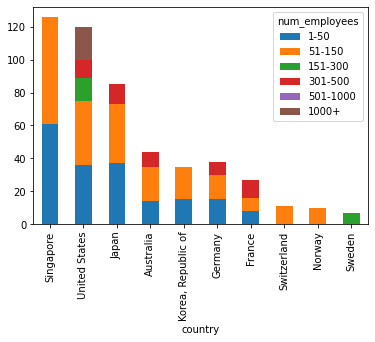

In [42]:
country_size_num.plot(kind = "bar", stacked = True)

### 3.2.4 Kết luận

Như vậy, ta đã có thể trả lời được câu hỏi: "Quốc gia nào đang tuyển dụng nhân lực ngành IT nhiều nhất tại Việt Nam?"

Qua trực quan thì dễ dàng thấy được `Singapore`, `United States` và `Japan` là 3 quốc gia hiện tại đang tuyển dụng nhiều nhân lực ngành IT ở Việt Nam với hơn 80 job hiện tại. Tuy nhiên thì các công ty đang tuyển dụng nhân lực đa phần còn non trẻ, có quy mô nhỏ, quy mô chủ yếu khoảng `1-50` và `51-150`. Điều này càng phản ánh 1 điều, càng ngày các quốc gia nước ngoài đang có xu hướng đầu từ dần sang Việt Nam bằng cách mở các chi nhánh nhỏ rồi dần quy mô hóa công ty. Cho thấy được khả năng ngoại ngữ có mức độ quan trọng rất lớn. 

Nhìn chung đa phần các quốc gia đều sử dụng tiếng Anh để có thể làm việc chung. Tuy nhiên ngoài các quốc gia sử dụng thuần tiếng Anh thì `Japan`,`Korea`, `Germany` hay `France` còn sử dụng ngôn ngữ gốc. Việc chọn một trong các ngôn ngữ này học sẽ là một lợi thế lớn trong việc tuyển dụng, làm việc và thăng tiến sau này nếu làm trong các công ty thuộc quốc gia đó.

## 3.3 Phương hướng phát triển nếu còn thời gian

Nếu có thêm thời gian, có thể sẽ phân tích sâu về `description` tìm kiếm những thông tin về salary, mở rộng thêm về câu hỏi các kỹ năng đang được tuyển dụng, những kỹ năng nào sẽ ứng với các mức lương như nào,...

# 4. Cảm nhận sau khi kết thúc môn học

## 4.1 Lê Đức Huy - 19120080

Trước hết là về giảng viên hướng dẫn là thầy Trần Trung Kiên:

Không phải em cố tình khen nhưng thực sự thầy dạy học rất nhiệt tình, thầy rất thân thiện với sinh viên đôi khi còn hay đùa để tạo tiếng cười giúp buổi học đỡ căng thẳng mệt mỏi, bài học của thầy rất cụ thể với từng bước demo rất rõ ràng, dễ hình dùng và hiểu bài rõ hơn.

Thứ 2 là về môn học "Lập trình cho khoa học dữ liệu":

Với một người dần mất định hướng về nghề nghiệp như em thì khi đăng ký học môn này quả là một lựa chọn đúng đắn. Kiến thức môn học này tuy chỉ ở mức "basic" nhưng thực sự rất hay, mở ra một con đường mới mà em có thể theo đuổi.

Từ khi bắt đầu với xuất phát điểm hơi thấp như là mới biết về cơ bản Python, chỉ sử dụng Windows thì qua môn học này thì em có thêm nhiều kiến thức mới, dần làm quen với vài câu lệnh Linux, làm việc nhiều hơn với Python, với các thư viện về dữ liệu và càng ngày kỹ năng càng được cải thiện rõ rệt qua các bài tập lab. Nếu xui xui rớt môn thì chắc chắn em sẽ đăng ký học lại ><! =)

Chung quy lại là môn học này hay, kiến thức bổ ích, giảng viên nhiệt tình, nên học dù là có theo hướng data science hay không vì tính ứng dụng có nó mang lại, có thể sử dụng trong nhiều công việc sau này.

## 4.2 Mai Duy Nam - 19120298

# 5. Tài liệu tham khảo

Link dataset: https://www.kaggle.com/halhuynh/it-jobs-dataset 

Pandas: https://pandas.pydata.org/docs/ 